In [143]:
import sympy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib import cm

In [144]:
def system(x: list, t):
    '''
    Creates a system of odes for odeint (i think the t argument is required for odeint).
    x is a list of "dogs'" 1D positions (x and y components handled separately). 
    returns a list of time derivatives of x, defined to be the difference between one dog and the next dogs position.
    this means that each dog's 'velocity' is equal to the displacement to the next dog (each dog follows the next)
    last dog follows first

    eg for 3 dogs:
    x1, x2, x3 input
    dx1dt = x2-x1
    dx2dt = x3-x2
    dx3dt = x1-x3

    returns [dx1dt, dx2dt, dx3dt]
    '''

    derivatives = []

    for i in range(0, len(x)-1): 
        derivatives.append(x[i+1]-x[i])
    derivatives.append(x[0]-x[len(x)-1])

    return derivatives


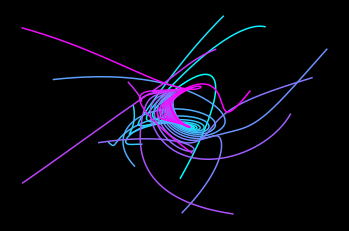

In [148]:
n = 20 # number of dogs

x0 = [random.random() for i in range(n)] # random starting coordinates for each dog
y0 = [random.random() for i in range(n)]
t = np.linspace(0, 20, 1000)
x = odeint(system, x0, t) # numerically solves the system of odes and returns a list of points of each dog, for each time t
y = odeint(system, y0, t)


lines = [] # creates list "lines" with [(dog 1 x, dog 1 y), (dog 2 x, dog 2 y),...] where dog 1 x is an array of x points for dog 1's curve
for i in range(n):  
    xy_pair = ([element[i] for element in x], [element[i] for element in y])
    lines.append(xy_pair)

fig, ax = plt.subplots(nrows=1, ncols=1)
cmap = cm.get_cmap('cool', n) # plot aesthetics
ax.axis('off')
fig.set_facecolor('black')

for i in range(n): # plotting each curve
    x = lines[i][0] 
    y = lines[i][1]
    ax.plot(x, y, color=cmap(i), lw=1.5)


#plt.savefig('pursuitcurves.png', dpi=1000)
